In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# 加载数据
data = load_iris().data[:, :2]
target = load_iris().target
features = load_iris().feature_names[:2]

In [11]:
# 数据预处理
data = StandardScaler().fit_transform(data)
x_train, x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=9)

In [15]:
# 模型构建
# 1.SVM模型
clf = svm.SVC(gamma='auto')
clf.fit(x_train, y_train)
print('svm 评分', clf.score(x_test, y_test))

# 2.KNN模型
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('knn 评分', knn.score(x_test, y_test))

# 3.logistic
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('logistic 评分', lr.score(x_test, y_test))

# 4.ridge
rc = RidgeClassifier()
rc.fit(x_train, y_train)
print('ridge 评分', rc.score(x_test, y_test))

svm 评分 0.9333333333333333
knn 评分 0.8666666666666667
logistic 评分 0.9333333333333333
ridge 评分 0.9333333333333333


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


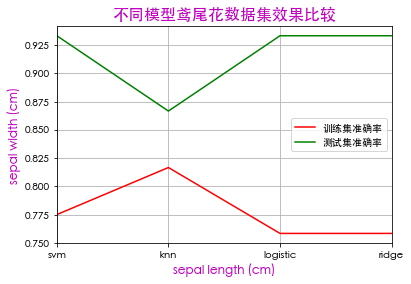

In [24]:
# 效果评估，分别评测测试机和训练集的数据
svm_train_score = accuracy_score(y_train, clf.predict(x_train))
svm_test_score = accuracy_score(y_test, clf.predict(x_test))

knn_train_score = accuracy_score(y_train, knn.predict(x_train))
knn_test_score = accuracy_score(y_test, knn.predict(x_test))

lr_train_score = accuracy_score(y_train, lr.predict(x_train))
lr_test_score = accuracy_score(y_test, lr.predict(x_test))

rc_train_score = accuracy_score(y_train, rc.predict(x_train))
rc_test_score = accuracy_score(y_test, rc.predict(x_test))

# 准确率图
train_score = [svm_train_score, knn_train_score, lr_train_score, rc_train_score]
test_score = [svm_test_score, knn_test_score, lr_test_score, rc_test_score]

plt.figure(facecolor='w')
plt.plot(range(4), train_score, 'r-', label='训练集准确率')
plt.plot(range(4), test_score, 'g-', label='测试集准确率')

plt.xlim([0, 1])
plt.title('不同模型鸢尾花数据集效果比较', fontsize=16, color='m')
plt.xticks(range(4), ['svm', 'knn', 'logistic', 'ridge'])
plt.xlabel(features[0], fontsize=12, color='m')
plt.ylabel(features[1], fontsize=12, color='m')

plt.legend()
plt.grid()
plt.show()

In [45]:
# 画图比较
N = 500
x1_min, x2_min = data.min(axis=0)
x1_max, x2_max = data.max(axis=0)

# 生成网格样本点
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)   # 形状均为（500，500）
# x1.falt 返回一个迭代器，可以使用for访问x1中的每个元素
grid_show = np.dstack((x1.flat, x2.flat))[0]  

# 使用模型预测测试样本点
svm_predict = clf.predict(grid_show)
svm_predict = svm_predict.reshape(x1.shape)

knn_predict = knn.predict(grid_show)
knn_predict = knn_predict.reshape(x1.shape)

lr_predict = lr.predict(grid_show)
lr_predict = lr_predict.reshape(x1.shape)

rc_predict = rc.predict(grid_show)
rc_predict = rc_predict.reshape(x1.shape)

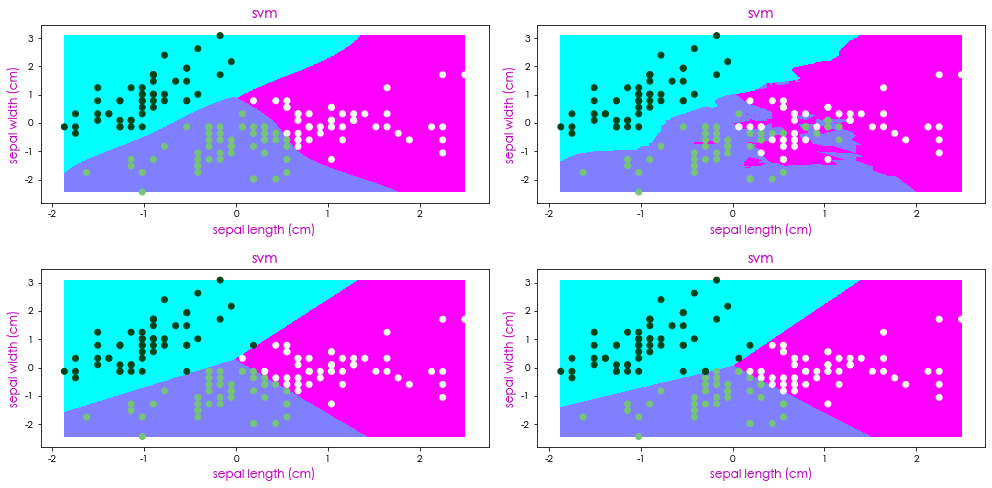

In [68]:
plt.figure(facecolor='w', figsize=(14, 7))

# svm
plt.subplot(2, 2, 1)
# 区域图
plt.pcolormesh(x1, x2, svm_predict, cmap='cool')
# 向图中增加样本点
plt.scatter(data[:, 0], data[:, 1], c=clf.predict(data), cmap='Greens_r', zorder=1)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=clf.predict(x_test), s=120, zorder=2)
plt.title(u'svm', fontsize=14, color='m')
plt.xlabel(features[0], fontsize=12, color='m')
plt.ylabel(features[1], fontsize=12, color='m')


# knn
plt.subplot(2, 2, 2)
# 区域图
plt.pcolormesh(x1, x2, knn_predict, cmap='cool')
plt.scatter(data[:, 0], data[:, 1], c=knn.predict(data), cmap='Greens_r', zorder=1)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=knn.predict(x_test), s=120, zorder=2)
plt.title(u'svm', fontsize=14, color='m')
plt.xlabel(features[0], fontsize=12, color='m')
plt.ylabel(features[1], fontsize=12, color='m')


# logistic
plt.subplot(2, 2, 3)
# 区域图
plt.pcolormesh(x1, x2, lr_predict, cmap='cool')
plt.scatter(data[:, 0], data[:, 1], c=lr.predict(data), cmap='Greens_r', zorder=1)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=lr.predict(x_test), s=120, zorder=2)
plt.title(u'svm', fontsize=14, color='m')
plt.xlabel(features[0], fontsize=12, color='m')
plt.ylabel(features[1], fontsize=12, color='m')


# ridge
plt.subplot(2, 2, 4)
# 区域图
plt.pcolormesh(x1, x2, rc_predict, cmap='cool')
plt.scatter(data[:, 0], data[:, 1], c=rc.predict(data), cmap='Greens_r', zorder=1)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=rc.predict(x_test), s=120, zorder=2)
plt.title(u'svm', fontsize=14, color='m')
plt.xlabel(features[0], fontsize=12, color='m')
plt.ylabel(features[1], fontsize=12, color='m')

plt.tight_layout(pad=1.5)   # 设置图与图之间的高度方向的间距
plt.show()

3.0907752482994253